In [1]:

# Function to convert a sequence of CAN IDs into a fixed-size vector
def extract_features(can_data, window_size=64):
    """
    Converts a sequence of CAN IDs into a fixed-size vector.
    :param can_data: List of CAN IDs (e.g., integers or strings)
    :param window_size: The size of the sliding window (input length)
    :return: A feature vector of length `window_size`
    """
    # Ensure that we have a fixed window size by padding the sequence if it's smaller
    # or truncating it if it's larger
    if len(can_data) < window_size:
        # Padding with 0 (assuming CAN IDs range from 0 to 255)
        can_data = [0] * (window_size - len(can_data)) + can_data
    elif len(can_data) > window_size:
        # Truncating if the sequence is longer than the window size
        can_data = can_data[:window_size]

    return np.array(can_data)

# Create a dataset of normal and intrusion data
def create_dataset(normal_can_data, intrusion_can_data, window_size=64):
    """
    Create a dataset for training.
    :param normal_can_data: List of CAN IDs for normal traffic
    :param intrusion_can_data: List of CAN IDs for intrusion traffic
    :param window_size: The size of the sliding window for feature extraction
    :return: Tuple of feature array X and label array y
    """
    features = []
    labels = []

    # Extract features for normal data
    for i in range(len(normal_can_data) - window_size + 1):
        window_data = normal_can_data[i:i+window_size]
        features.append(extract_features(window_data, window_size))
        labels.append(0)  # 0 for normal

    # Extract features for intrusion data
    for i in range(len(intrusion_can_data) - window_size + 1):
        window_data = intrusion_can_data[i:i+window_size]
        features.append(extract_features(window_data, window_size))
        labels.append(1)  # 1 for intrusion

    return np.array(features), np.array(labels)

# Function to load CAN ID data from a file and remove the first character
def load_can_ids_from_file(file_path):
    """
    Loads CAN IDs from a file, removes the first character, and returns them as a list of integers.
    :param file_path: Path to the file containing CAN IDs (one per line)
    :return: List of CAN IDs as integers
    """
    with open(file_path, 'r') as file:
        # For each line, strip it, remove the first character, and convert to integer
        can_ids = [int(line.strip()[1:], 16) for line in file.readlines() if line.strip()]
    return can_ids



print("Start")
!pip install tensorflow==2.13
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
print(tf.__version__)


# Load normal and intrusion CAN ID data
normal_can_data = load_can_ids_from_file('NORMAL_IDS.txt')  # File containing normal CAN IDs
intrusion_can_data = load_can_ids_from_file('DOS_IDS.txt')  # File containing intrusion CAN IDs

# Creation of the datasets normal/intrusion
X, y = create_dataset(normal_can_data, intrusion_can_data)

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalization of features (CAN IDs in range 0-255)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define of the neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # get a binary output ( normal or intrusion)
])

# model compilation
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# training
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluation
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Convert probabilities to binary predictions

# a  classification report
print(classification_report(y_test, y_pred))

# Save the model to do demonstration locally
model.save('can_intrusion_detection_model.h5')

Start
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 66.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 81.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 28.4 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.12.2
    Uninstalling typing_extensions-4.12.2:
      Successfully uninstalled typing_extensions-4.12.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
  Attempting uninstall: keras
    Found existing installation: keras 3.5.0
    Uninstalling keras-3.5.0:
      Successfully uninstalled keras-3.5.0
  Attempting uninstall: gast
    Found existing installation: gast 0.6.0
    Uninstalling gast-0.6.0:


2.13.0
Epoch 1/10
49441/49441 [==============================] - 135s 3ms/step - loss: 0.1608 - accuracy: 0.9383 - val_loss: 0.0915 - val_accuracy: 0.9662
Epoch 2/10
49441/49441 [==============================] - 139s 3ms/step - loss: 0.1060 - accuracy: 0.9613 - val_loss: 0.0633 - val_accuracy: 0.9781
Epoch 3/10
49441/49441 [==============================] - 142s 3ms/step - loss: 0.0870 - accuracy: 0.9686 - val_loss: 0.0543 - val_accuracy: 0.9810
Epoch 4/10
49441/49441 [==============================] - 139s 3ms/step - loss: 0.0765 - accuracy: 0.9726 - val_loss: 0.0472 - val_accuracy: 0.9832
Epoch 5/10
49441/49441 [==============================] - 134s 3ms/step - loss: 0.0702 - accuracy: 0.9751 - val_loss: 0.0442 - val_accuracy: 0.9841
Epoch 6/10
49441/49441 [==============================] - 139s 3ms/step - loss: 0.0658 - accuracy: 0.9765 - val_loss: 0.0396 - val_accuracy: 0.9862
Epoch 7/10
49441/49441 [==============================] - 132s 3ms/step - loss: 0.0622 - accuracy: 0.9779

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


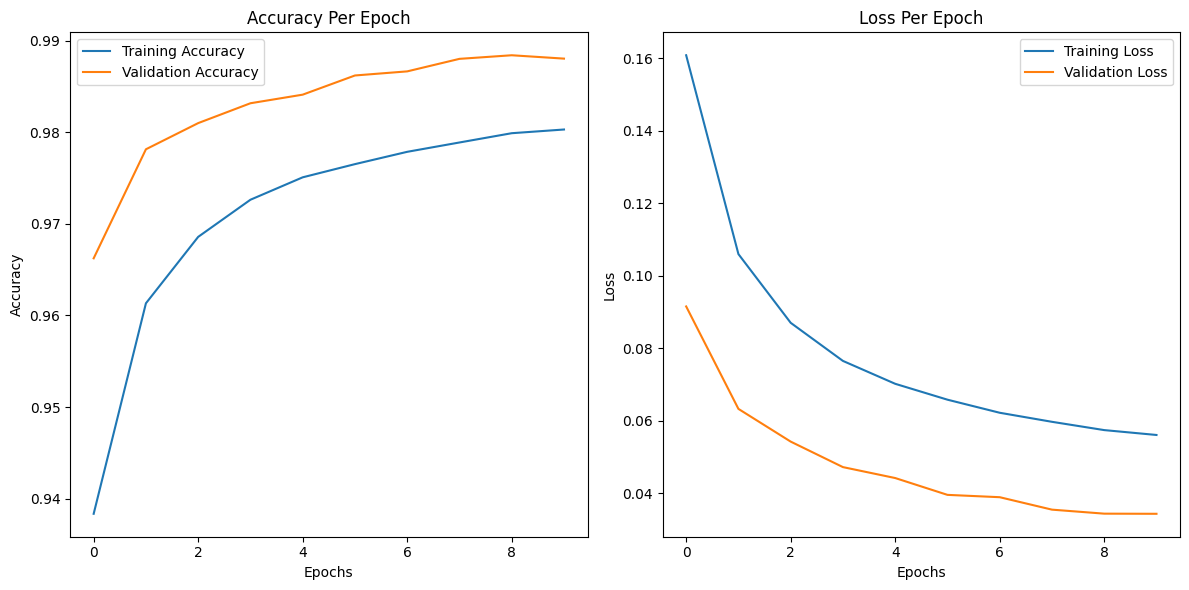

In [3]:
import matplotlib.pyplot as plt


# Extract accuracy and loss values
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Accuracy Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Loss Per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
 #Assuming NORMAL_IDS.txt contains one CAN ID per line
def read_can_data(file_path):
    # Read CAN IDs from the file
    with open(file_path, 'r') as file:
        can_ids = file.readlines()

    # Chop the first character from each CAN ID
    can_ids = [can_id.strip()[1:] for can_id in can_ids]  # strip() removes newline characters, [1:] removes first character
    return can_ids
# Function to preprocess the window and convert CAN IDs to numeric
def preprocess_window(window, window_size=64):
    """
    Preprocess the window data into the shape (1, window_size).
    :param window: List of CAN IDs (e.g., hexadecimal strings)
    :param window_size: The size of the sliding window (input length)
    :return: A preprocessed feature vector reshaped to (1, window_size)
    """
    # Convert hexadecimal CAN IDs (strings) to integers
    window_data = [int(can_id, 16) for can_id in window]

    # Ensure the window is fixed size
    window_data = extract_features(window_data, window_size)

    # Reshape to (1, window_size) for the model
    window_data = window_data.reshape(1, window_size)  # Reshape to (1, window_size)

    # Normalize the data (assuming scaler is already fitted)
    window_data = scaler.transform(window_data)  # Normalize using the same scaler used during training

    return window_data

def create_windows(can_ids, window_size=64):
    # Create sliding windows of data from the can_ids list
    windows = []
    for i in range(len(can_ids) - window_size + 1):
        windows.append(can_ids[i:i + window_size])
    return windows




intrusion=0
normal = 0

# Example usage
file_path = 'NORMAL_IDS.txt'
can_ids = read_can_data(file_path)  # Read and process CAN IDs
input_data = create_windows(can_ids[45341:], window_size=64)  # Create windows of size 64

# Optionally, print a few windows
for window in input_data[:5]:
    print(window)

for i in range(0,200):
   #print("Get a prediciton")
    window = input_data[i]  # Get the first window (replace with the desired window)
    processed_window = preprocess_window(window)  # Preprocess it

    # Get the prediction from the model
    prediction = model.predict(processed_window)
    #print(f"Prediction: {prediction}")
    # Interpret the prediction (output is between 0 and 1, where 0 means normal and 1 means intrusion)
    if prediction < 0.5:
 #       print("Prediction: Normal traffic")
        normal+=1
    else:
#        print("Prediction: Intrusion detected")
        intrusion+=1

print("normal: "+str(normal))
print("Intrusion: "+str(intrusion))


['430', '4b1', '1f1', '153', '002', '130', '131', '140', '18f', '260', '2a0', '2b0', '316', '329', '350', '545', '43f', '370', '440', '2c0', '002', '153', '130', '131', '140', '4f0', '2b0', '316', '18f', '260', '2a0', '329', '350', '545', '43f', '370', '440', '2c0', '430', '4b1', '1f1', '153', '002', '130', '131', '140', '2b0', '18f', '260', '2a0', '316', '329', '350', '545', '43f', '370', '440', '2c0', '002', '153', '130', '131', '140', '4f0']
['4b1', '1f1', '153', '002', '130', '131', '140', '18f', '260', '2a0', '2b0', '316', '329', '350', '545', '43f', '370', '440', '2c0', '002', '153', '130', '131', '140', '4f0', '2b0', '316', '18f', '260', '2a0', '329', '350', '545', '43f', '370', '440', '2c0', '430', '4b1', '1f1', '153', '002', '130', '131', '140', '2b0', '18f', '260', '2a0', '316', '329', '350', '545', '43f', '370', '440', '2c0', '002', '153', '130', '131', '140', '4f0', '2b0']
['1f1', '153', '002', '130', '131', '140', '18f', '260', '2a0', '2b0', '316', '329', '350', '545', '43

In [4]:
# Save the fitted scaler for later use
import joblib
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']